In [ ]:
'''For the equation ut + cux = 0 test computationally for the following schemes with the initial data
with I.C : u(x, 0) = u0(x) =
1 if x ≤ 0
2x-3x**2+1 if 0 ≤ x ≤ 1
0 x ≥ 1
and c = 1: Godunov scheme, Lax-Friedrich scheme and Lax-Wendroff scheme at t=2,5 and 7. Compare
with exact solution for different choices of the ratio c∆t
h = .5, .75, 1.'''


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Initial data
def u(x):
  if x<=0:
    return 1
  elif x>=0 and x<=1:
    return 2*(x**3)-3*(x**2)+1
  elif x>=1:
    return 0

#Actual solution
def actualsoln(c,t,x):
  return u(x-c*t)

#space points

dx=0.1
l_x=round(2/dx)
x=np.linspace(-1,1,l_x)

#Godunov scheme
def Godunov(c,r):
  #time points
  dt=(r*dx)/c
  l_t=round(8/dt)
  t=np.linspace(0,8,l_t)


  #Creating a scheme that takes the information at time level to go to next time level
  def godunov_nxt(u_n):
    l=len(u_n)
    w=np.zeros(l)
    for i in range(1,l-1):
      w[i]=u_n[i]-r*(1+np.sign(c))*(u_n[i]-u_n[i-1])/2-r*(1-np.sign(c))*(u_n[i+1]-u_n[i])/2
    return w

  #generating the solution grid
  x_new=np.linspace(-1-l_t*dx,1+l_t*dx,2*l_t+l_x)
  u_0=[u(y) for y in x_new]
  v=np.zeros([l_t,l_x])
  V=u_0
  for i in range(0,l_t):
    v[i]=V[l_t-i:-(l_t-i)]
    V=godunov_nxt(V)
    V=V[1:-1]
  return v

#Lax-Friedrichs Scheme

def LaxFriedrichs(c,r):
  #time points
  dt=(r*dx)/c
  l_t=round(8/dt)
  t=np.linspace(0,8,l_t)


  #Creating a scheme that takes the information at time level to go to next time level
  def lax_nxt(u_n):
    l=len(u_n)
    w=np.zeros(l)
    for i in range(1,l-1):
      w[i]=(u_n[i+1]+u_n[i-1])/2-r*(u_n[i+1]-u_n[i-1])/2
    return w

  #generating the solution grid
  x_new=np.linspace(-1-l_t*dx,1+l_t*dx,2*l_t+l_x)
  u_0=[u(y) for y in x_new]
  v=np.zeros([l_t,l_x])
  V=u_0
  for i in range(0,l_t):
    v[i]=V[l_t-i:-(l_t-i)]
    V=lax_nxt(V)
    V=V[1:-1]
  return v

#Lax-Wendroff Scheme
def LaxWendroff(c,r):
  #time points
  dt=(r*dx)/c
  l_t=round(8/dt)
  t=np.linspace(0,8,l_t)


  #Creating a scheme that takes the information at time level to go to next time level
  def wendroff_nxt(u_n):
    l=len(u_n)
    w=np.zeros(l)
    for i in range(1,l-1):
      w[i]=u_n[i]-r*(u_n[i+1]-u_n[i-1])/2+r**2*(u_n[i+1]-2*u_n[i]+u_n[i-1])/2
    return w

  #generating the solution grid
  x_new=np.linspace(-1-l_t*dx,1+l_t*dx,2*l_t+l_x)
  u_0=[u(y) for y in x_new]
  v=np.zeros([l_t,l_x])
  V=u_0
  for i in range(0,l_t):
    v[i]=V[l_t-i:-(l_t-i)]
    V=wendroff_nxt(V)
    V=V[1:-1]
  return v






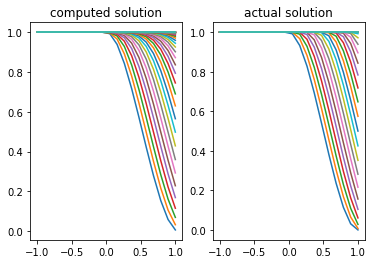

In [ ]:
#plot of Godunov scheme scheme for ratio 0.5
f(Godunov,1,0.5)

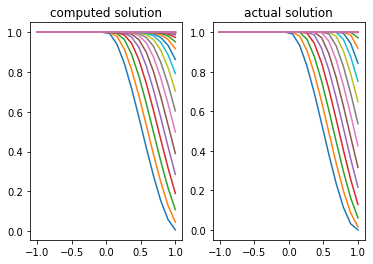

In [ ]:
#plot of Godunov for ratio 0.75
f(Godunov,1,0.75)

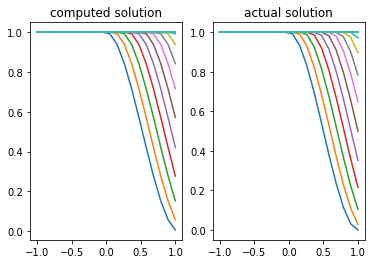

In [ ]:
#plot of Godunov for ratio 1
f(Godunov,1,1)

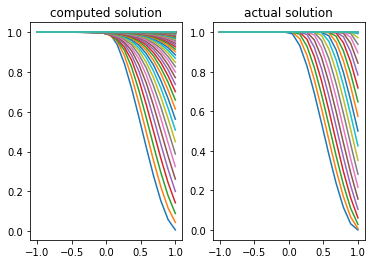

In [ ]:
#plot of Lax-Friedrichs for ratio 0.5
f(LaxFriedrichs,1,0.5)


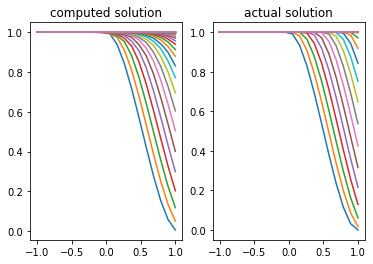

In [ ]:
#plot of Lax-Friedrichs for ratio 0.75
f(LaxFriedrichs,1,0.75)

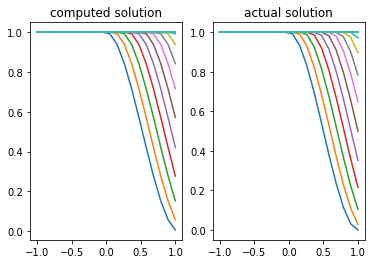

In [ ]:
#plot of Lax-Friedrichs for ratio 1
f(LaxFriedrichs,1,1)


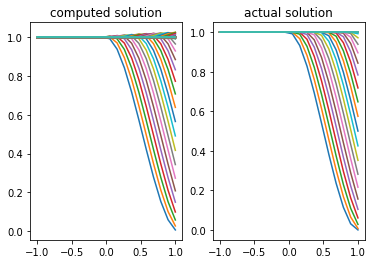

In [ ]:
#plot of LaxWendroff for ratio 0.5
f(LaxWendroff,1,0.5)

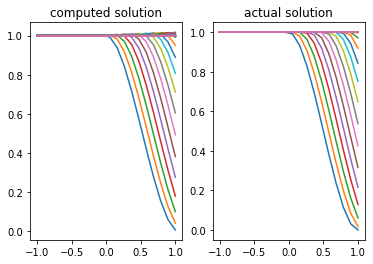

In [ ]:
#plot of LaxWendroff for ratio 0.75
f(LaxWendroff,1,0.75)

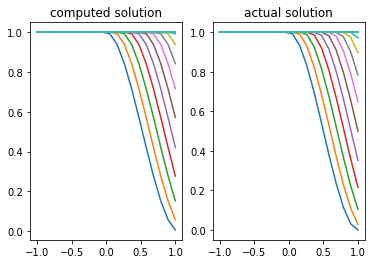

In [ ]:
#plot of LaxWendroff for ratio 1
f(LaxWendroff,1,1)

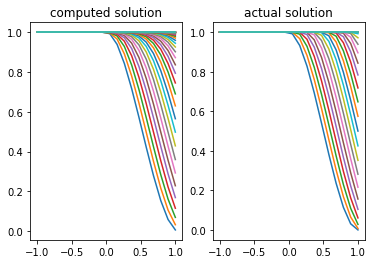

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#plotting actual solution vs computed solution
def f(scheme,c,r):
  v=scheme(c,r)
  dt=(r*dx)/c
  ax1=plt.subplot(1,2,1)
  ax2=plt.subplot(1,2,2)
  for i in range(v.shape[0]):
    ax1.plot(x,v[i])
    soln=[actualsoln(c,i*dt,y) for y in x]
    ax2.plot(x,soln)
  ax1.set_title('computed solution')
  ax2.set_title('actual solution')
#f(Godunov,1,0.5)
#f(LaxWendroff,1,0.5)
#f(LaxWendroff,1,0.5)






In [ ]:
#plotting error of actual solution vs computed solution at time t=2,5,7

def er(scheme,c,r):
  v=scheme(c,r)
  dt=(r*dx)/c
  for k in [2,5,7]:
    i=round(k/dt)
    compsoln=v[i]
    soln=[actualsoln(c,k,y) for y in x]
    err=soln-compsoln
    #print(err)
    plt.plot(x,err,label='time ='+str(k))
    plt.legend()

#er(Godunov,1,0.5)
#er(LaxFriedrichs,1,0.5)
#er(LaxWendroff,1,0.5)

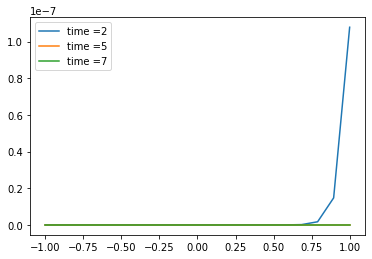

In [ ]:
#error plot of Godunov for ratio 0.75
er(Godunov,1,0.75)

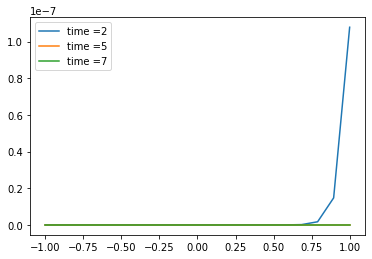

In [ ]:
#error plot of Godunov for ratio 1
er(Godunov,1,0.75)

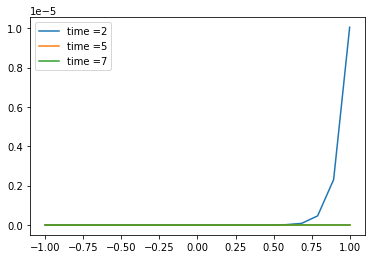

In [ ]:
#error plot of Godunov for ratio 0.5
er(Godunov,1,0.5)


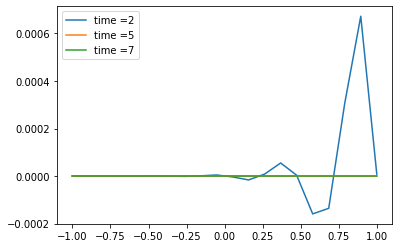

In [ ]:
#error plot of Lax-Wendroff for ratio 0.5
er(LaxWendroff,1,0.5)

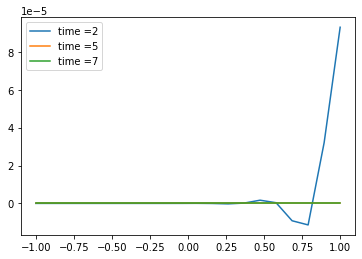

In [ ]:
#error plot of Lax-Wendroff for ratio 0.75
er(LaxWendroff,1,0.75)

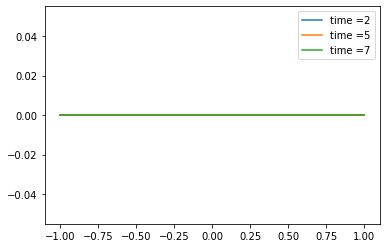

In [ ]:
#error plot of Lax-Wendroff for ratio 1
er(LaxWendroff,1,1)

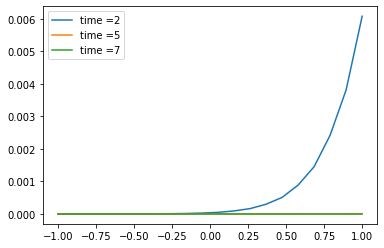

In [ ]:
#error plot of Lax-Friedrichs for ratio 0.5
er(LaxFriedrichs,1,0.5)

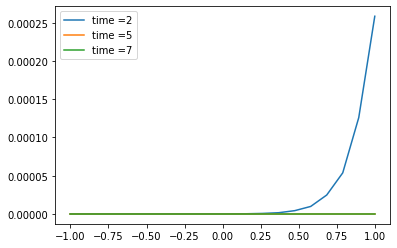

In [ ]:
#error plot of Lax-Friedrichs for ratio 0.75
er(LaxFriedrichs,1,0.75)

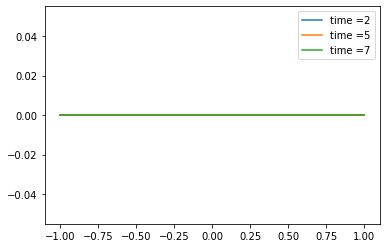

In [ ]:
#error plot of Lax-Friedrichs for ratio 1
er(LaxFriedrichs,1,1)